# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** 
A quantidade de quartos (RM) de uma casa muito provavelmente causará um impacto significativo no valor (MEDV) deste imóvel. Um imóvel com mais quartos tende a ter um valor maior que imóveis com menos quartos. O efeito inverso também poderá ser notado, pois uma casa com menos quartos tende a diminuir seu valor.

A quantidade de moradores de baixa renda também afetará negativamente o valor de um imóvel, embora não afete de forma tão forte quanto a quantidade de quartos. Uma vizinhança com moradores abastados tende a valorizar os imóveis ao redor. O inverso também é verdadeiro, pois uma vizinhança onde existem apenas pessoas de baixa renda diminuirá o preços dos imóveis da vizinhança.

O ratio de estudantes e professores é a feature que terá um impacto menos perceptível no valor dos imóveis. Embora possa existir algum impacto, acredito que este impacto será praticamente imperceptível.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
A avaliação através do coeficiente de determinação adotado, conhecido como R^2, indica que o modelo conseguiu prever com uma taxa de acerto de 92%, o que é uma taxa aceitável para o caso em questão. Métricas como a R^2 nos permitem avaliar a acurácia e precisão de um modelo quando não é possível fazer uma avaliação visual dos seus resultados. Através do R^2, pode-se concluir que este modelo capturou bem a variação da variável alvo. Este análise pode ser corroborada por uma análise visual dos dados, nos quais temos que os valores previstos foram próximos dos valores reais. Houve uma margem de erro, mas o pior caso foi de apenas 1.1, enquanto o melhor caso foi de apenas 0.1.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split


# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
Quando dividimos os dados entre dados de teste e dados de treinamento, podemos averiguar a qualidade das previsões realizadas por nosso modelo em um conjunto de dados separado e diferente dos dados de treinamento. Caso façamos as previsões usando somente os dados de treinamento, não saberemos se o modelo é capaz de generalizar bem para dados desconhecidos.

Da mesma forma, também podemos checar o desempenho deste modelo, ou seja, o quão rápido ele é para realizar essas previsões. Esta separação entre os dados também ajuda a prevermos casos de overfitting, permitindo que tomemos medidas para evitar modelos muito complexos, contendo features desnecessárias, por exemplo. Modelos muito complexos podem acarretar em uma acurácia e precisão ruins, já que o modelo não é capaz de capturar precisamente o relacionamento existente entre os dados.

Caso não façamos testes com nosso modelo, checando e validando suas previsões, não temos como garantir que ele está fazendo previsões boas o suficiente ou em um tempo viável. Um modelo que não faz boas previsões pode causar problemas e a gravidade desses problemas está diretamente relacionada à area de sua aplicação. 

Por exemplo, espera-se que um self-driving car tenha um modelo que preveja situações de tráfego com correção em 99,99999% (ou mais) dos casos. Sem testes prévios, engenheiros podem colocar um carro deste tipo na rua e que prevê apenas 80% dos casos, causando acidentes.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

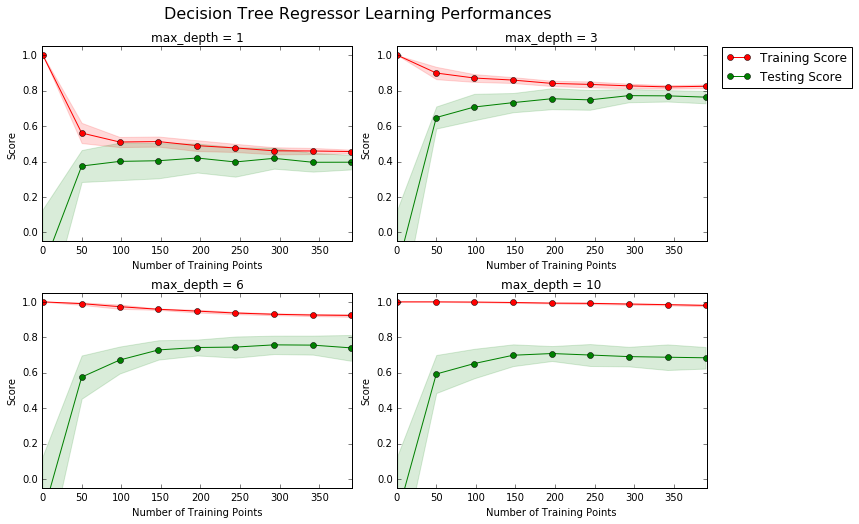

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
Através da análise do gráficos apresentados, pode-se deduzir que um max_depth com valor 1 pode gerar um modelo com high bias, no qual o modelo não consegue identificar os relacionamentos existentes no conjunto de dado de treinamento. Neste gráfico, podems ver que o score para os dados de treinamento é baixo e tende a estabilizar em um score entre 0.4 e 0.5. Da mesma forma, o score para os dados de teste também é baixo, tendendo a estabilizar em 0.4.

O gráfico que representa um max_depth de 3 apresenta-se como a melhor solução. Neste caso, não se vê um high bias, já que os scores para os dados de teste apresenta uma tendência a estabilizar-se com o melhor valor entre todos os gráficos, mais ou menos em 0.8. Da mesma forma, não há uma high variance, pois o modelo também se comporta bem ao generalizar para o conjunto de dados de teste, que também tende a se estabilizar próximo ao score de 0.8. 

Neste gráfico, conforme mais training points são adicionados, a curva que representa os scores dos dados de teste melhora, estabilizando em um score próximo a 0.8. Entretanto, a curva representando os dados de treinamento diminui, mas tende a estabilizar em 0.8 também. Neste caso, como as curvas demonstram, os dois valores estão estabilizando em um valor próximo a 0.8, o que demonstra não haver necessidade de mais trainings points. 

O gráficos que representam o max_depth com valores 6 e 10 (mais especialmente o valor 10) apresenta um modelo altamente especializado para acertar as predições no conjunto de dados de treinamento, mas com um baixo poder de generalização, já que não tem um bom desempenho para o conjunto de dados de teste.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

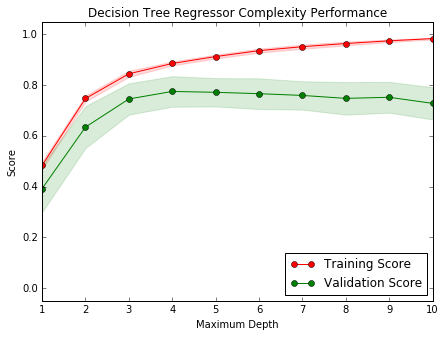

In [11]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
Com um maximum depth de 1, o modelo sofre de high bias, já que não consegue capturar bem os relacionamentos existentes nos dados de treinamento. Neste caso, pode-se observar, através do gráfico, que o score obtido para os dados de treinamento é bastante baixo. Esta conclusão pode ser obtida ao verificar no gráfico que o score obtido para os dados de treinamento foi baixo, aproximadamente em 0.5.

Quando o maximum depth é de 10, entretanto, há uma alta variação, já que o modelo é bom para prever valores dentro do conjunto de dados de treinamento (quase próximo de 100%), mas não consegue generalizar bem de forma a ter boas predições para o conjunto de dados de teste. Neste caso, esta conclusão é embasada através do gráfico, onde temos um score próximo de 1 para os dados de treinamento, mas baixo com relação aos dados de teste, obtendo algo próximo a 0.7.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
Um max_depth de 4 parece ser o valor que mais se aproxima de um resultado melhor para generalizar para dados de teste. No gráfico, este é o ponto em X onde temos o maior score (Y) e que também não é tão diferente do score obtido nos dados de treinamento.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
O Grid Search pode ser usado para avaliar combinações de parâmetros para um classificador, por exemplo. Ele realizará uma validação cruzada para determinar qual combinação de parâmetros provê um melhor desempenho. Desta forma, podemos usar o Grid Search para encontrar os parâmetros que nos dão um modelo com bom desempenho e que pode ser obtido através de poucas linhas de código, ao invés de uma análise manual.

Para funcionar, o GridSearch precisa ter um 'estimator', que é um algoritmo de classificação ou regressão, além de um conjunto de parâmetros e os possíveis valores para cada um destes parâmetros. De posse destas informações, o GridSearch realizará testes com combinações diferentes destes parâmetros, usando uma métrica de desempenho para determinar qual combinação de parâmetros provê um modelo mais calibrado. Neste caso, o modelo mais calibrado é aquele que possui um melhor desempenho conforme a métrica de desempenho usada.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
É uma técnica que divide o conjunto de dados em uma quantidade K de partições de mesmo tamanho. Neste caso, usamos uma dessas partições como nossos dados de teste, enquanto as demais partições serão usadas como dados de treinamento. Nesta técnica, serão executados K experimentos, onde em cada experimento, uma partição diferente será escolhida como os dados de teste, enquanto as demais serão usadas como dados de treinamento. Neste caso, podemos testar nosso modelo com praticamente todo o conjunto de dados sendo usado como dados de teste e treinamento. Assim teremos uma média de desempenho. Obviamente, os testes de desempenho serão mais lentos, conforme o tamanho do conjunto de dados, mas teremos uma boa avaliação de desempenho na predição do nosso modelo.

O GridSearch ajuda a encontrar os melhores parâmetros para obter o melhor desempenho possível de um "estimator" através do uso de técnicas de cross-validation, como a K-Fold. O GridSearch precisa ser guiado por alguma métrica de desempenho e normalmente é usada a validação cruzada. Caso não haja uma métrica de desempenho ou caso essa métrica não seja confiável, o GridSearch pode não encontrar o melhor conjunto de parâmetros a ser adotado.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [6]:
# DONE: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn import grid_search
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # DONE: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # DONE: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 10)}

    # DONE: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # DONE: Create the grid search object
    grid = grid_search.GridSearchCV(estimator=regressor, param_grid=params,scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [7]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
No modelo otimizado identificado pelo GridSearch, o melhor valor para max_depth foi de 4, o que confirma minha sugestão na questão 6, encontrada através de uma análise visual.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [9]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: **

Baseado na mediana encontrada na seção de Data Exploration, cujo valor é de 438,900.00, considero que a casa do Cliente 3 encontra-se bem acima dessa mediana, devido ao grande número de quartos, que é elevado, e devido à vizinhança não ter um elevado índice de pobreza (apenas 3%), o que pode indicar ser um imóvel em uma área luxuosa. Essas duas features são, conforme descrevi na Questão 1, as que possuem maior força para alterar a variável alvo, que neste caso é o preço do imóvel. Neste caso, sugiro um valor bem acima da mediana e próximo ao valor máximo: 800,000.00 e 1,000,000.00. De forma mais direta, em uma análise superficial e sem considerar os valores previstos acima, eu sugeriria o valor de 900,000.00.

Considerando a análise acima, considero que a casa do Cliente 2 encontra-se muito abaixo da média, dado o número de quartos e a alta taxa de pobreza da vizinhança, o que afeta muito negativamente o valor dos imóveis. Considerando o valor da mediana, o valor deste imóvel deve se encontrar muito abaixo dela, sendo próximo ao valor mínimo. Sugiro um valor entre 100,000.00 e 200,000.00. De forma mais direta, em uma análise superficial e sem considerar os valores previstos acima, eu sugeriria o valor de 200,000.00.

A casa do Cliente 1 encontra-se entre um meio termo entre as casas dos Clientes 2 e 3, portanto, considero que seu valor será algo próximo ao valor da mediana, localizando-se em um valor entre 400,000.00 e 450,000.00. De forma mais direta, em uma análise superficial e sem considerar os valores previstos acima, eu sugeriria o valor de 400,000.00.

Abaixo estão os valores da Questão 1, para facilitar a análise.

Minimum price: 105,000.00

Maximum price: 1,024,800.00

Mean price: 454,342.94

Median price 438,900.00

Standard deviation of prices: 165,171.13

# Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [41]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $407,400.00
Trial 2: $397,950.00
Trial 3: $405,825.00
Trial 4: $367,500.00
Trial 5: $396,480.00
Trial 6: $435,600.00
Trial 7: $367,500.00
Trial 8: $437,220.00
Trial 9: $405,825.00
Trial 10: $393,750.00

Range in prices: $69,720.00


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
Caso APENAS dados obtidos em 1978 sejam usados para prever os valores de imóveis nos dias atuais, então, podemos ter valores que não estão próximos da realidade atual. Diversos fatores podem ter mudado, como a mudança no índice de pobreza da vizinhança, o que alteraria sensivelmente o valor dos imóveis.

Acredito que outras features podem ser introduzidas com o objetivo de tentar obter um modelo mais robusto. Analisando as features em https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names, considero que seria possível, por exemplo, trocar a feature PTRATION por CRIM, já que acredito que esta última é mais relevante na determinação do valor do imóvel. Ou, pelo menos, adicioná-la para análise.

Acredito que a diferença entre o valor mínimo e o valor máximo previsto pelo modelo nos trials acima indicam uma necessidade de aprimoramento. O valor é de 70,000.00 e acredito que é um valor alto e que nenhum cliente gostaria de abrir mão. Para este caso, acredito que é necessário um modelo mais robusto. Também baseio minha análise no gráfico de curvas da Questão 4 e também no gráfico de complexidade. Considerando que o max_depth usado foi de 4, isto indica, conforme estes gráficos, um desempenho próximo a 80%, o que considero baixo. Um desempenho maior que 90%, do meu ponto de vista, seria um valor mais aceitável para este estudo de caso.

Dados sobre imóveis urbanos não são aplicáveis para prever preços de imóveis rurais, pois os fatores que determinam o preço de um imóvel rural são bem diferentes dos fatores que determinam o valor de um imóvel urbano. Por exemplo, em um imóvel rural o tamanho do terreno pode ter um peso muito maior que a quantidade de quartos. Aliás, a quantidade de quartos pode até nem ser relevante. Neste caso, um modelo preparado para prever valores de imóveis urbanos preverá valores totalmente errados para imóveis rurais.